<a href="https://colab.research.google.com/github/innovatorved/learn-tensorflow/blob/master/tensorflow_NN_Classification_Analyse_FashionMsnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification Problem FMNIST Dataset**

In [ ]:
#@title Copyright 2021
#  help : https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l03c01_classifying_images_of_clothing.ipynb#scrollTo=Lhan11blCaW7

Import tensorflow DataSet library

In [ ]:
!pip install tensorflow
!pip install -U tensorflow_datasets
!pip install cv2

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math 
import numpy as np
import matplotlib.pyplot as plt

## **Three Dense Layers**

* flatten flat the array to 1 D
* convert 2d array of 28*28 int to 1D vector of 784p

In [ ]:
# flatten flat the array to 1 D
l0 = tf.keras.layers.Flatten(input_shape = (28,28 ,1)) # convert 2d array of 28*28 int to 1D vector of 784p

* add activation function
* ReLU: An activation function that allows a model to solve nonlinear problems

* here several of these functions (ReLU, Sigmoid, tanh, ELU), but ReLU is used most commonly and serves as a good default. 


In [ ]:
# add avtivation function
# ReLU: An activation function that allows a model to solve nonlinear problems
"""
here several of these functions (ReLU, Sigmoid, tanh, ELU), but ReLU is used most commonly and serves as a good default. 
"""
l1 = tf.keras.layers.Dense(128 , activation=tf.nn.relu)

* last layer or Output layer
* it contains 10unit because our feminist Fashion MNIST dataset contain 10 types of Grooming clothes
* it returns the probility distribution for each in 10 clothes
* we use softmax activation function
* Softmax: A function that provides probabilities for each possible output class

In [ ]:
# last layer or Output layer
# it contains 10unit because our feminist Fashion MNIST dataset contain 10 types of Grooming clothes
# it returns the probility distribution for each in 10 clothes
# we use softmax activation function
# Softmax: A function that provides probilities for each possible output class
l2 = tf.keras.layers.Dense(10 , activation=tf.nn.softmax)


## **DataSet**


What If We Only Have One Data Set?

    * Divide into two sets:
        1. training set
        2 .test set
    * Classic gotcha: do not train on test data
        1. Getting surprisingly low loss?
        2. Before celebrating, check if you're accidentally training on test data



In [ ]:
import tensorflow_datasets as tfds
import math 
import numpy as np

In [ ]:
# loading dataset
dataset , metadata = tfds.load('fashion_mnist' ,as_supervised=True ,with_info=True)


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
"""
dataset.keys()
# Output : dict_keys(['train', 'test'])
"""
# split dataset
train_dataset , test_dataset = dataset["train"] , dataset["test"]

In [ ]:
# extract labels for data want to predict
"""
# print(metadata.__doc__)
Information about a dataset.

  `DatasetInfo` documents datasets, including its name, version, and features.
  See the constructor arguments and properties for a full list.

  Note: Not all fields are known on construction and may be updated later
  by `compute_dynamic_properties`. For example: the min and max values of a
  feature is typically updated during data generation (i.e. on calling
  builder.download_and_prepare()`)"""
print(metadata.supervised_keys)

('image', 'label')


In [ ]:
# list of type of an image
class_name = metadata.features["label"].names

In [ ]:
# check train and test data size
name_train = metadata.splits["train"].num_examples
name_test = metadata.splits["test"].num_examples
print(f"Size of Train Data : {name_train} && Size of Test Date : {name_test}")

Size of Train Data : 60000 && Size of Test Date : 10000


In [ ]:
print(train_dataset.take(1).__doc__)

A `Dataset` containing the first `count` elements from its input.


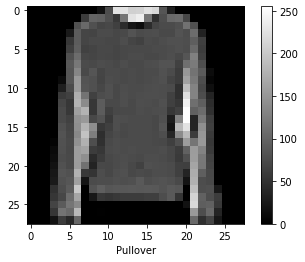

In [ ]:
# before normalize
# extract 1st image and label
for img , label in train_dataset.take(1):
  pass

# plt.imshow(img)
# change image shape we previous flatten
plt.figure()
img = img.numpy().reshape(28 , 28)
plt.imshow(img , cmap='gray')
plt.xlabel(class_name[label])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# from sklearn.preprocessing import Normalizer
# nom = Normalizer()
# img = nom.fit_transform(data)

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

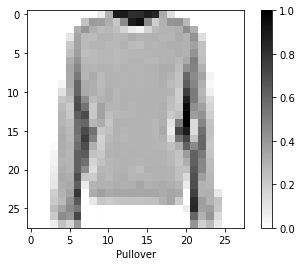

In [ ]:
# After normalize
# extract 1st image and label
for img , label in train_dataset.take(1):
  pass

# plt.imshow(img)
# change image shape we previous flatten
plt.figure()
img = img.numpy().reshape(28 , 28)
plt.imshow(img , cmap=plt.cm.binary)
plt.xlabel(class_name[label])
plt.colorbar()
plt.grid(False)
plt.show()

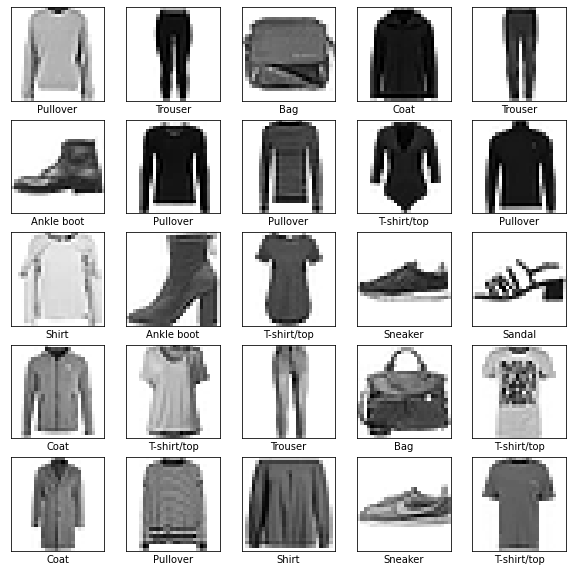

In [ ]:
plt.figure(figsize = (10,10))
for i , (img , label) in enumerate(train_dataset.take(25)):
  img = img.numpy().reshape(28,28)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img , cmap=plt.cm.binary)
  plt.xlabel(class_name[label])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

This network has three layers:

* **input** `tf.keras.layers.Flatten` — This layer transforms the images from a 2d-array of 28 $\times$ 28 pixels, to a 1d-array of 784 pixels (28\*28). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn, as it only reformats the data.

* **"hidden"** `tf.keras.layers.Dense`— A densely connected layer of 128 neurons. Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, and outputs a single value to the next layer.

* **output**  `tf.keras.layers.Dense` — A 128-neuron, followed by 10-node *softmax* layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range `[0, 1]`, representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

> Note: Using `softmax` activation and `SparseCategoricalCrossentropy()` has issues and which are patched by the `tf.keras` model. A safer approach, in general, is to use a linear output (no activation function) with `SparseCategoricalCrossentropy(from_logits=True)`.

In [ ]:
# @title details about layers
print("""
    This network has three layers:

    input     tf.keras.layers.Flatten — This layer transforms the images from a 2d-array of 28 × 28 pixels, to a 1d-array of 784 pixels (28*28). Think of this layer as unstacking rows of pixels in the image and lining them up. 
              This layer has no parameters to learn, 
              as it only reformats the data.

    "hidden"  tf.keras.layers.Dense— A densely connected layer of 128 neurons. 
              Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, 
              and outputs a single value to the next layer.

    output    tf.keras.layers.Dense — A 128-neuron, followed by 10-node softmax layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, 
              and outputs a value in the range [0, 1], representing the probability that the image belongs to that class. 
              The sum of all 10 node values is 1.

    Note: Using softmax activation and SparseCategoricalCrossentropy() has issues and which are patched by the tf.keras model. A safer approach, in general, 
          is to use a linear output (no activation function) with SparseCategoricalCrossentropy(from_logits=True).




""")


    This network has three layers:

    input     tf.keras.layers.Flatten — This layer transforms the images from a 2d-array of 28 × 28 pixels, to a 1d-array of 784 pixels (28*28). Think of this layer as unstacking rows of pixels in the image and lining them up. 
              This layer has no parameters to learn, 
              as it only reformats the data.

    "hidden"  tf.keras.layers.Dense— A densely connected layer of 128 neurons. 
              Each neuron (or node) takes input from all 784 nodes in the previous layer, weighting that input according to hidden parameters which will be learned during training, 
              and outputs a single value to the next layer.

    output    tf.keras.layers.Dense — A 128-neuron, followed by 10-node softmax layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, 
              and outputs a value in the range [0, 1], representing the probability t

In [ ]:
model = tf.keras.Sequential([l0 , l1 , l2])

##**Compile the Model**


Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer="adam" , 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

## Train the model

First, we define the iteration behavior for the train dataset:
1. Repeat forever by specifying `dataset.repeat()` (the `epochs` parameter described below limits how long we perform training).
2. The `dataset.shuffle(60000)` randomizes the order so our model cannot learn anything from the order of the examples.
3. And `dataset.batch(32)` tells `model.fit` to use batches of 32 images and labels when updating the model variables.

Training is performed by calling the `model.fit` method:
1. Feed the training data to the model using `train_dataset`.
2. The model learns to associate images and labels.
3. The `epochs=5` parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

(Don't worry about `steps_per_epoch`, the requirement to have this flag will soon be removed.)

In [ ]:
batch_size = 32 
# tells model.fit use batches of 32 images and labels when updating the model variables.
# name_train : size of train data
train_dataset = train_dataset.cache().repeat().shuffle(name_train).batch(batch_size)
test_dataset = test_dataset.cache().batch(batch_size)

In [ ]:
steps_per_epoche_int = math.ceil(name_train/batch_size) # epoche step for train data

model.fit(train_dataset , epochs = 5 , steps_per_epoch=steps_per_epoche_int)

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 0.4987 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3372 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8913


## **Evaluate accuracy of the model**

In [ ]:
steps_per_epoche_int_test = math.ceil(name_test/batch_size) # epoche step for test data

text_losses , test_accuracy = model.evaluate(test_dataset , steps = steps_per_epoche_int_test)
print(f" Accuracy : {test_accuracy} && Loss {text_losses}")

313/313 [==============================] - 1s 4ms/step - loss: 0.3481 - accuracy: 0.8779
 Accuracy : 0.8779000043869019 && Loss 0.34812623262405396


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)


In [ ]:
len(test_images) # 32 batch in one

32

In [ ]:
len(predictions)

32

In [ ]:
print(predictions[0]) # label distribution

# index of highest value
print(np.argmax(predictions[0]))

[1.2317707e-04 3.6730803e-06 4.4687707e-03 1.5925239e-06 9.6498203e-01
 1.2315245e-07 3.0414341e-02 1.4685225e-08 6.1846094e-06 2.0915031e-08]
4


In [ ]:
test_labels[0]

4

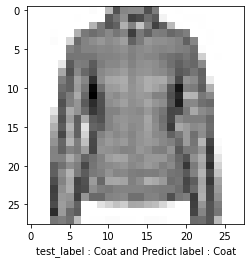

In [ ]:
plt.imshow(test_images[0].reshape(28,28) , cmap = plt.cm.binary)
plt.xlabel(f"test_label : {class_name[test_labels[0]]} and Predict label : {class_name[np.argmax(predictions[0])]}")
plt.show()

## **Check for random Image**

`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

Now predict the image:

In [ ]:
for test_images, test_labels in test_dataset.take(1999): # .take() para contain no. of img avail in test dataset
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()


# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

# Add the image to a batch where it's the only member.
img = np.array([img])
print(img.shape)

(28, 28, 1)
(1, 28, 28, 1)


[[1.2421327e-02 1.1523191e-05 5.1333901e-02 9.0400219e-01 2.5421990e-02
  7.0677413e-07 6.3769636e-03 1.3942919e-10 4.3136952e-04 9.4158115e-10]]
3


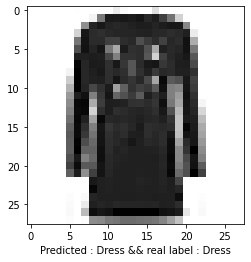

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)
max = np.argmax(predictions_single)
# print(max)
plt.imshow(img.reshape(28,28) , cmap=plt.cm.binary)
plt.xlabel(f"Predicted : {class_name[max]} && real label : {class_name[test_labels[0]]}")
plt.show()
